In [15]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot
from numpy import linalg as LNG
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "Dummy Data HSS.csv")
filepath

'd:\\1. Active Projects\\Data Analysis\\Github Repository\\simple-machine-learning\\classification\\digital_marketing_data_(dummy)\\Dummy Data HSS.csv'

In [3]:
marketing_data = pd.read_csv(filepath)
marketing_data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [4]:
marketing_data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [5]:
marketing_data.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [6]:
marketing_data["Influencer"] = marketing_data["Influencer"].astype("category")
marketing_data["Influencer"]

0        Mega
1        Mega
2        Mega
3        Mega
4       Micro
        ...  
4567    Micro
4568     Nano
4569    Micro
4570    Macro
4571    Micro
Name: Influencer, Length: 4572, dtype: category
Categories (4, object): ['Macro', 'Mega', 'Micro', 'Nano']

In [7]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   TV            4562 non-null   float64 
 1   Radio         4568 non-null   float64 
 2   Social Media  4566 non-null   float64 
 3   Influencer    4572 non-null   category
 4   Sales         4566 non-null   float64 
dtypes: category(1), float64(4)
memory usage: 147.7 KB


In [8]:
marketing_data.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [9]:
marketing_data.isna().sum().sum()

26

In [10]:
marketing_data.isnull().values.any()

True

**Null & Missing Data Treatment:**

***Treatment options:***
Omit: Delete/exclude respective value.
Ignore: Leave them be.
Iterate: Filling with stochastic regression iteration.

***Null***: We will **ignore** the null since we assume that it's a normal input (as 1 or 100).

***N/A (Missing Values)***: We will **omit** the N/A values since it can reduce the prediction robustness, we can actually iterate since the total of missing data is 26/4572 or 0.0011%. But since the data itself is not timebound (no time variables), stochastic regression iteration would be inefficient thus can provide bias.



In [11]:
marketing_data.dropna()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [12]:
Target_Sales = [] #Declaring a new list
for i in marketing_data["Sales"]: 
    if i > 272:
        i = 1
        Target_Sales.append(i)
    else:
        i = 0
        Target_Sales.append(i)
marketing_data["Target_Sales"] = Target_Sales # A new column to hold our already categoried quality 
marketing_data

,TV,Radio,Social Media,Influencer,Sales,Target_Sales
0,16.0,6.566231,2.907983,Mega,54.732757,0
1,13.0,9.237765,2.409567,Mega,46.677897,0
2,41.0,15.886446,2.913410,Mega,150.177829,0
3,83.0,30.020028,6.922304,Mega,298.246340,1
4,15.0,8.437408,1.405998,Micro,56.594181,0
...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866,0
4568,71.0,20.610685,6.545573,Nano,249.101915,0
4569,44.0,19.800072,5.096192,Micro,163.631457,0
4570,71.0,17.534640,1.940873,Macro,253.610411,0


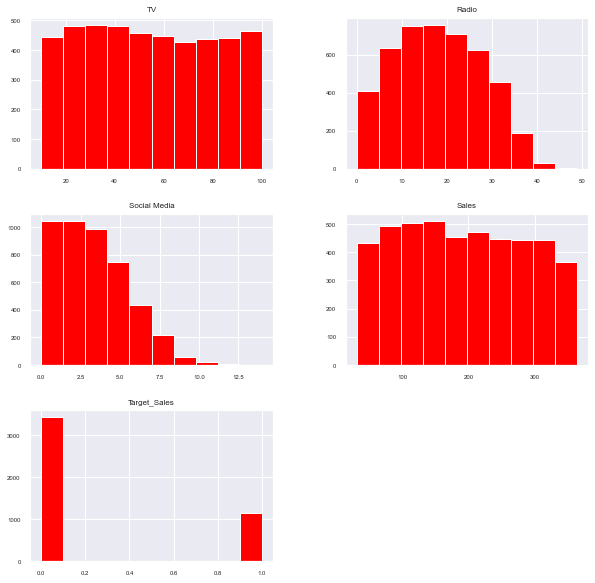

In [14]:
sns.set()
fig = marketing_data.hist(figsize=(10,10), color='red', xlabelsize=6, ylabelsize=6)
[x.title.set_size(8) for x in fig.ravel()]
plt.show()